In [157]:
import pandas as pd
import numpy as np

In [150]:
path = "/Users/annasintsova/git_repos/" \
       "HUTI-RNAseq/analysis/DE/2018-01-09-exploring-top-DE-genes/" \
       "data/DE-seq-results-all-core-edited.csv"
de = pd.read_csv(path, index_col="sym")
de.columns

Index(['Unnamed: 0', 'baseMean', 'log2FoldChange', 'lfcSE', 'stat', 'pvalue',
       'padj', 'KO', 'bnum'],
      dtype='object')

In [149]:
ref_path = "/Users/annasintsova/git_repos/" \
       "HUTI-RNAseq/analysis/DE/2018-01-09-exploring-top-DE-genes/" \
       "data/asym_strain_top_UP.csv"
aSt = pd.read_csv(ref_path, index_col="sym")
genes = list(aSt.index)
genes

['narH',
 'fdnI',
 'narJ',
 'yoaG',
 'ytfE',
 'narK',
 'fdnG',
 'yeaR',
 'narG',
 'ydfZ',
 'Z0893',
 'narI',
 'narH',
 'metA',
 'yqgD',
 'hmpA',
 'nirB',
 'fdnH',
 'hcp',
 'yhcP',
 'cspA',
 'ygbA',
 'gntK',
 'yhcR',
 'hcr',
 'ryfA',
 'gltB',
 'ndh',
 'ydcX',
 'citB',
 'dsdA',
 'yhcQ',
 'ogt',
 'Z1954',
 'tehB',
 'yhcN',
 'grxA',
 'fhuC',
 'fepE',
 'ydhC',
 'evgA',
 'nlpI',
 'Z4919']

In [169]:
de2 = de.loc[genes]
de3 = pd.merge(aSt, de2, left_index=True, right_index=True)
de3.columns
de4 = de3[["bnum_x","bnum_y", "fold", "log2FoldChange"]]
de4 = de4.dropna()
de4["log2_asym"] = np.log2(de4.fold)
de4.head
final = de4[["bnum_y", "log2FoldChange", "log2_asym"]]
final = final.rename(index = str, columns={"bnum_y": "bnum", "log2FoldChange":"HM_UTI_log2FC",
                                           "log2_asym":"EColi_83972_log2FC"})
final
final.to_csv("/Users/annasintsova/git_repos/" \
       "HUTI-RNAseq/analysis/DE/2018-01-09-exploring-top-DE-genes/" \
       "data/clinical_strains_vs_83972.csv")

In [13]:
ur_c["average"]

16946_metE                             87076.822756
18506_ompA                             52870.066462
15346_ompC                             46887.043792
18760_hns_2                            39854.180435
18168_ahpC                             34253.517718
16894_ilvC                             29024.141477
17669_aceE                             28550.382434
16252_tdcE                             23632.185035
18682_icd                              22867.439231
16356_nanA                             21556.615246
15738_raiA                             21116.220192
14841_infC                             20708.865832
16449_fusA                             20095.863773
17061_metF                             18190.168165
16419_rpsD                             18054.204251
17448_uxuA                             17790.010056
15297_psuG                             17617.952195
17098_rplL                             16660.597688
17753_metQ                             15949.117710
18639_acpP  

In [117]:
ref = path = "/Users/annasintsova/git_repos/" \
       "HUTI-RNAseq/analysis/DE/2018-01-09-exploring-top-DE-genes/" \
       "data/asymptomatic_strain_top50.csv"
aSt= pd.read_csv(ref)
aSt = aSt.set_index(aSt['bnum'])
aSt = aSt[['Name', 'signal']]
aSt.shape
aSt['asym_rank'] = [i for i in range(1, 50)]
asym_top50 = list(aSt.index)
asym_top50

['b0205',
 'b4414',
 'b3985',
 'b4408',
 'b1823',
 'b3297',
 'b0605',
 'b2591',
 'b3306',
 'b3339',
 'b3296',
 'b3309',
 'b3295',
 'b1094',
 'c2758',
 'b3310',
 'b3298',
 'b3231',
 'b2621',
 'Z2747',
 'b3320',
 'b3123',
 'b3341',
 'b3299',
 'b2779',
 'b3782',
 'b3983',
 'b2579',
 'b1677',
 'b2153',
 'b0114',
 'b3986',
 'b0169',
 'c4310',
 'b4457',
 'b3301',
 'b2415',
 'b3305',
 'b3637',
 'b1779',
 'b3342',
 'b3186',
 'b3307',
 'b4000',
 'b0755',
 'b3340',
 'b3321',
 'b1824',
 'b3316']

In [118]:
p2 = "/Users/annasintsova/git_repos/" \
       "HUTI-RNAseq/analysis/DE/2018-01-09-exploring-top-DE-genes/" \
       "data/DE-seq-results-all-core-edited.csv"
df = pd.read_csv(p2, index_col=0)
df2 = df.loc[uti_top50]
df2["sym"]
df3 = pd.merge(uti_c, df2, left_index=True, right_index=True)
df3.columns
df4 = df3[['average','sym','bnum']]
df4 = df4.set_index(df4['bnum'])
df5 = df4[['sym', 'average']]
df5["clin_rank"] = [i for i in range(1, 51)]
df5
uti_top50_bnum = list(df5.index)

In [122]:
uti_asym = [x for x in uti_top50_bnum if x in asym_top50]
len(uti_asym)

21

In [106]:
final = pd. merge(aSt, df5,left_index=True, right_index=True, how='inner' )


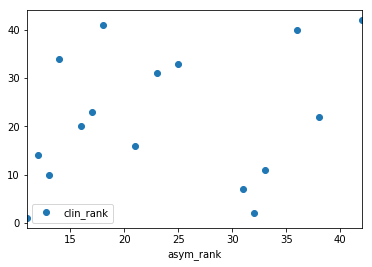

In [108]:
%matplotlib inline
final.plot(x='asym_rank', y='clin_rank', style = 'o')

In [111]:
final2 = pd. merge(aSt, df5,left_index=True, right_index=True, how='outer' )
final2['asym_rank'].fillna(0, inplace=True)
final2['clin_rank'].fillna(0, inplace=True)
final2.shape

(78, 6)

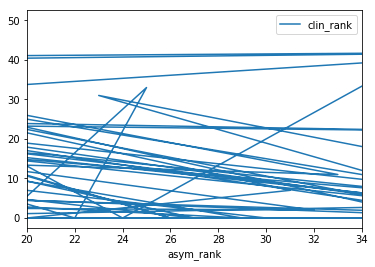

In [114]:
%matplotlib inline
final2.plot(x='asym_rank', y='clin_rank')

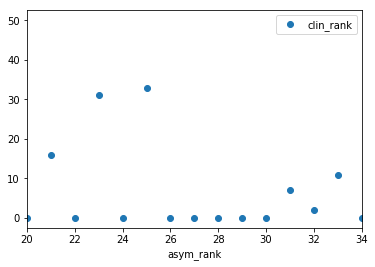

In [113]:
%matplotlib inline
final2.plot(x='asym_rank', y='clin_rank', style = 'o')

In [124]:
df6 = df.loc[ur_top50]
df7 = pd.merge(ur_c, df6, left_index=True, right_index=True)

df8 = df7.set_index(df7['bnum'])

ur_top50_bnum = list(df8.index)
ur_top50_bnum

['b3829',
 'b0957',
 'b2215',
 'b1237',
 'b0605',
 'b3774',
 'b0114',
 'b3951',
 'b1136',
 'b3225',
 'b2597',
 'b1718',
 'b3340',
 'b3941',
 'b3296',
 'b4322',
 'b2165',
 'b3986',
 'b3661',
 'b1094',
 'b3980',
 'b3236',
 'b0072',
 'b2464',
 'b3985',
 'b0169',
 'b0911',
 'b1677',
 'b4323',
 'b2579',
 'b3172',
 'b3295',
 'b1426',
 'b0893',
 'b4143',
 'b0755',
 'b4013',
 'b2942',
 'b1617',
 'b0014',
 'b3783',
 'b1451',
 'b0073',
 'b2551',
 'b3939',
 'b1452',
 'b0432',
 'b0118',
 'b4000',
 'b2697']

In [125]:
ur_asym = [x for x in ur_top50_bnum if x in asym_top50]
len(ur_asym)

13

In [126]:
ur_asym

['b0605',
 'b0114',
 'b3340',
 'b3296',
 'b3986',
 'b1094',
 'b3985',
 'b0169',
 'b1677',
 'b2579',
 'b3295',
 'b0755',
 'b4000']